# **A Regression Model to predict House Sale-Price based on Plots Characteristics using Multi-Variable Linear Regression**

Step 1: Importing Libraries

In [82]:
# Import numpy and pandas package
import pandas as pd
import numpy as np
# Data visualization
from matplotlib import pyplot as plot
import statsmodels.api as sm
import seaborn as sns

Step 2: Reading the Dataset and Inspecting

In [83]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML-DSE4/Project_College/Housing.csv')

In [84]:
data.head(10)

price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
5              no             yes        2      yes   semi-furnished  
6              no             yes        2      yes   semi-furnished  
7              no              no        0       no      unfurnished  
8              no             yes        2      yes        furnished  
9              no             yes        1      yes      unfurnished

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [86]:
data.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [87]:
data.shape

(545, 13)

Step 3: Data Preprocessing

In [ ]:
#Data Cleaning
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

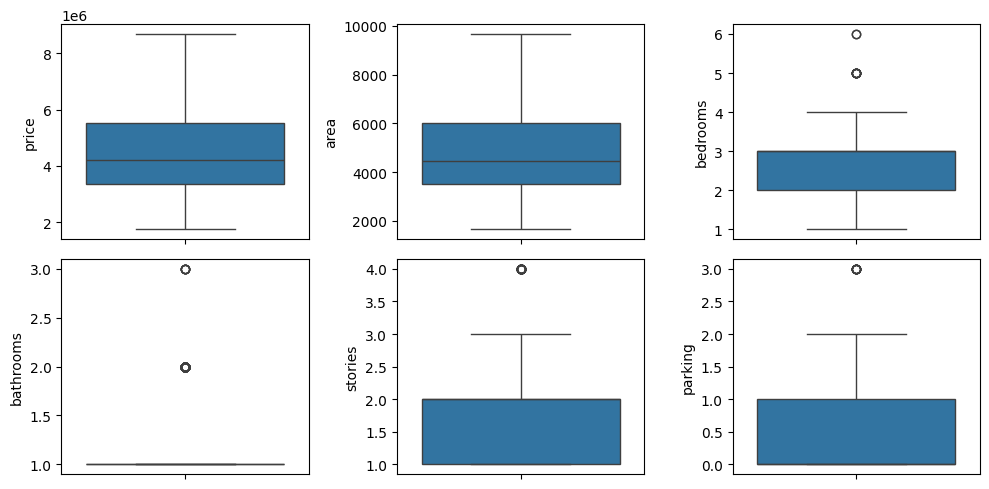

In [105]:
#Detecting for Outliers
def detectOutliers():
    fig, axs = plot.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(data['price'], ax = axs[0,0])
    plt2 = sns.boxplot(data['area'], ax = axs[0,1])
    plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
    plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
    plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
    plt3 = sns.boxplot(data['parking'], ax = axs[1,2])
    plot.tight_layout()
detectOutliers()

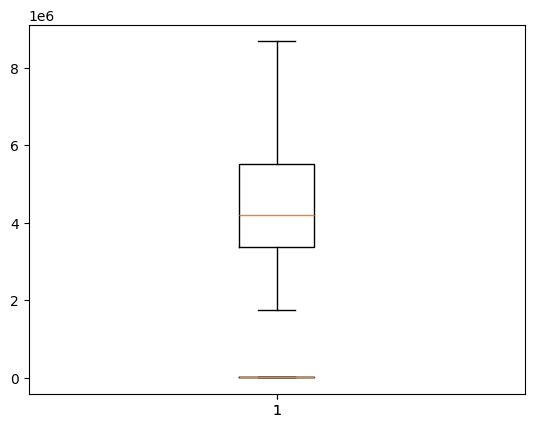

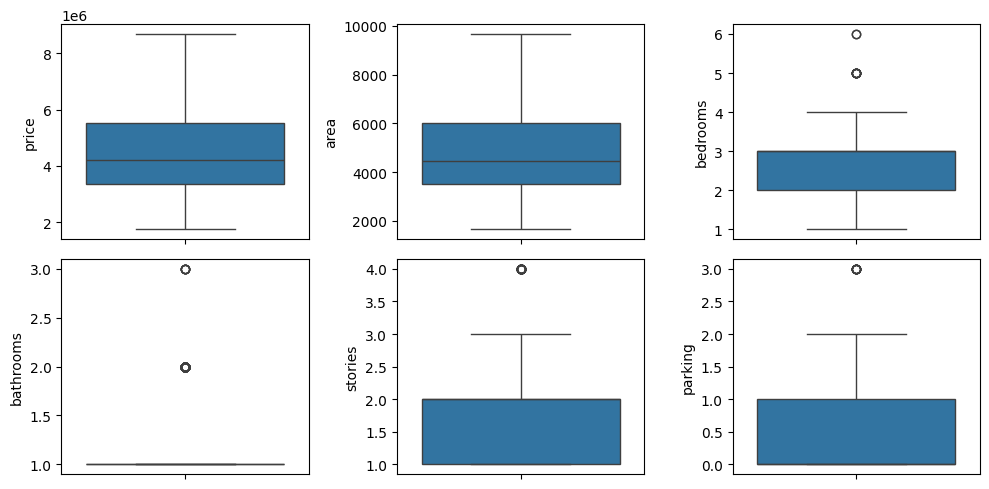

In [104]:
#Removing Outliers
# Outlier reduction for price
plot.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]
# Outlier reduction for area
plot.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

#To verify the outlier is still existing
detectOutliers()

Step 4: Data Visualizations

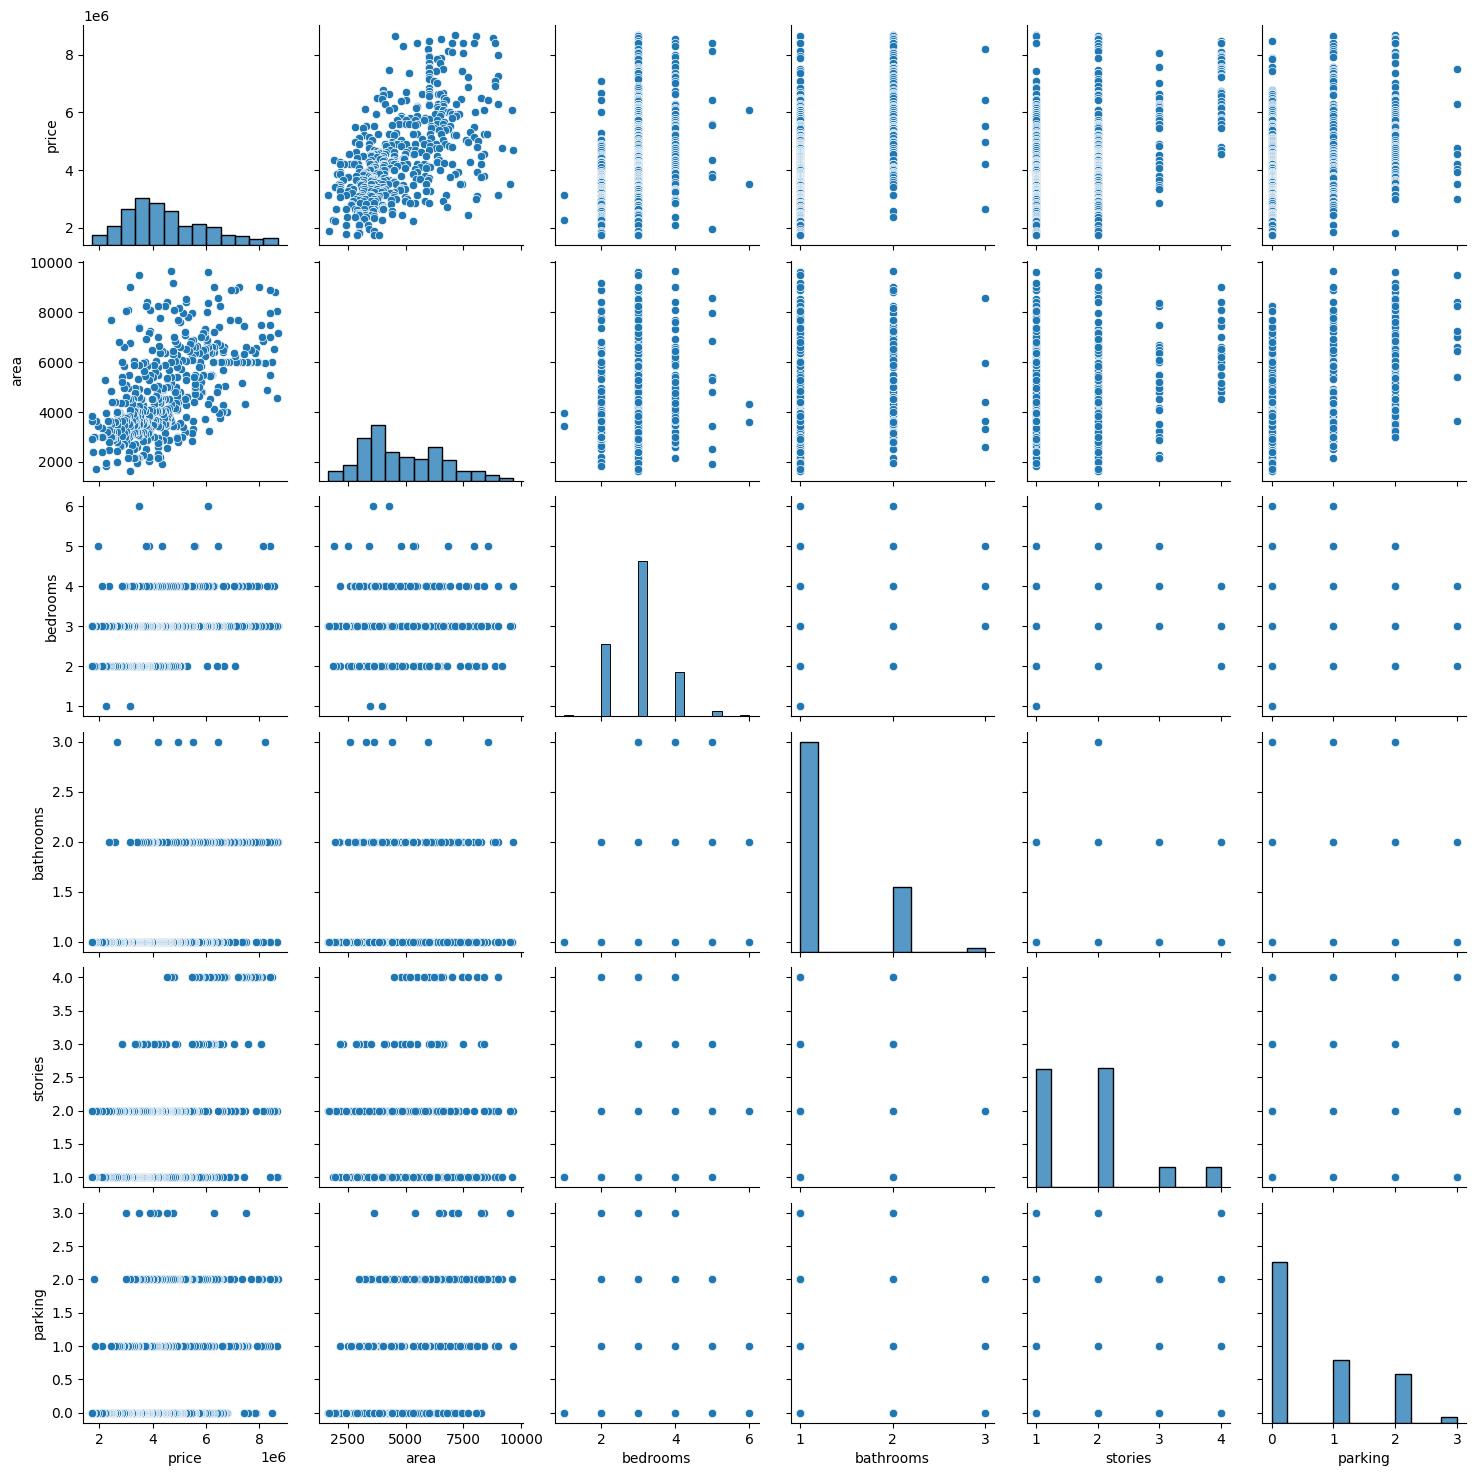

In [106]:
sns.pairplot(data)
plot.show()

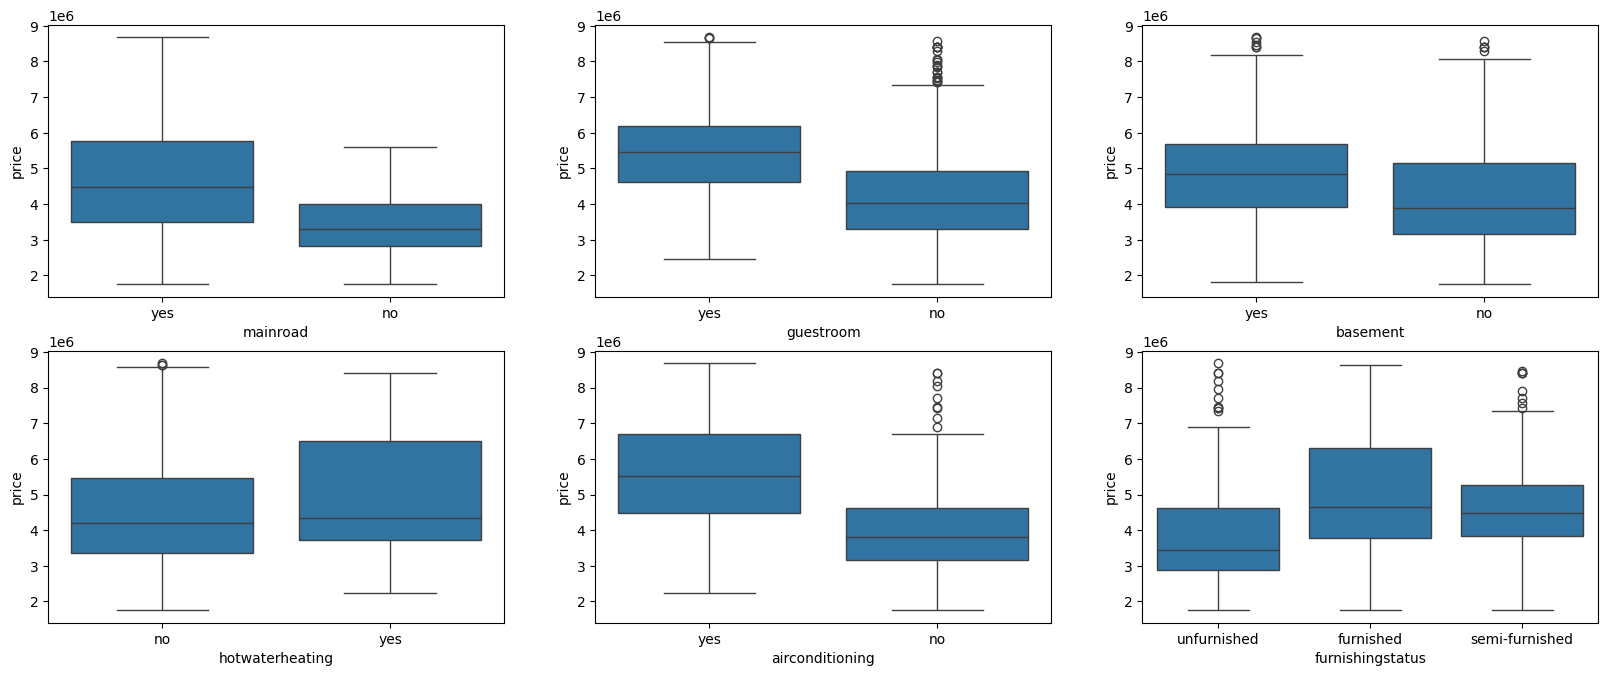

In [107]:
#Visualizing the Categorical Variables
plot.figure(figsize=(20, 12))
plot.subplot(3,3,1)
sns.boxplot(x='mainroad', y='price', data=data)
plot.subplot(3,3,2)
sns.boxplot(x='guestroom', y='price', data=data)
plot.subplot(3,3,3)
sns.boxplot(x='basement', y='price', data=data)
plot.subplot(3,3,4)
sns.boxplot(x='hotwaterheating', y='price', data=data)
plot.subplot(3,3,5)
sns.boxplot(x='airconditioning', y='price', data=data)
plot.subplot(3,3,6)
sns.boxplot(x='furnishingstatus', y='price', data=data)
plot.show()

Step 5: Data Preparations

To fit the data in the regression line, we need of numeric data not string.So, need to convert those string values to int.

In [108]:
def toNumeric(x):
    return x.map({"no":0,"yes":1})
def convert_binary():
    for column in list(data.select_dtypes(['object']).columns):
        if(column != 'furnishingstatus'):
            data[[column]] = data[[column]].apply(toNumeric)
convert_binary()

 Splitting the column for furnishing status that holds the value in three levels namely furnished/unfurnished/semi-furnished. To implement this we need dummy variables

In [109]:
status = pd.get_dummies(data['furnishingstatus'])
status

furnished  semi-furnished  unfurnished
21       False           False         True
22        True           False        False
23        True           False        False
24        True           False        False
25        True           False        False
..         ...             ...          ...
540      False           False         True
541      False            True        False
542      False           False         True
543       True           False        False
544      False           False         True

[506 rows x 3 columns]

Now, you don’t need three columns. You can drop the furnished column, as the type of furnishing can be identified with just the last two columns where

1. 00 will correspond to furnished

2. 01 will correspond to unfurnished

3. 10 will correspond to semi-furnished

In [110]:
#To drop the very first column of furnished
status = pd.get_dummies(data['furnishingstatus'], drop_first=True)
#Concat the status and main data frame as below,
data = pd.concat([data, status], axis=1)
#Remove the column furnishing status which is no longer needed.
data.drop(columns='furnishingstatus',inplace=True)


After all the changes, the data frame looks like

In [111]:
data

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
21   8680000  7155         3          2        1         1          1   
22   8645000  8050         3          1        1         1          1   
23   8645000  4560         3          2        2         1          1   
24   8575000  8800         3          2        2         1          0   
25   8540000  6540         4          2        2         1          1   
..       ...   ...       ...        ...      ...       ...        ...   
540  1820000  3000         2          1        1         1          0   
541  1767150  2400         3          1        1         0          0   
542  1750000  3620         2          1        1         1          0   
543  1750000  2910         3          1        1         0          0   
544  1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
21          1                0                1        2         0   
22          1                0                1        1         0   
23          1                0                1        1         0   
24          0                0                1        2         0   
25          1                0                1        2         1   
..        ...              ...              ...      ...       ...   
540         1                0                0        2         0   
541         0                0                0        0         0   
542         0                0                0        0         0   
543         0                0                0        0         0   
544         0                0                0        0         0   

     semi-furnished  unfurnished  
21            False         True  
22            False        False  
23            False        False  
24            False        False  
25            False        False  
..              ...          ...  
540           False         True  
541            True        False  
542           False         True  
543           False        False  
544           False         True  

[506 rows x 14 columns]

In [112]:
#Including the fields other than prices for the X data frame. For Y including the price field alone.
Y = data.price
# includes the fields other than prices
X = data.iloc[:,1:]

Checking for Multi-Collinearity

In [113]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

def preprocessing(X):
    # Separate numeric and categorical features
    numeric_features = X.select_dtypes(include=np.number).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Handle numeric features: Scaling and VIF calculation
    X_numeric = X[numeric_features]
    scaler = MinMaxScaler()
    X_numeric_scaled = scaler.fit_transform(X_numeric)
    X_numeric_scaled = pd.DataFrame(X_numeric_scaled, columns=numeric_features, index=X.index)

    # Handle categorical features: One-hot encoding
    if len(categorical_features) > 0: # Only if there are categorical features
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with statsmodels
        X_categorical_encoded = encoder.fit_transform(X[categorical_features])
        X_categorical_encoded = pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X.index)

        # Combine scaled numeric and encoded categorical features
        X_processed = pd.concat([X_numeric_scaled, X_categorical_encoded], axis=1)
    else:
        X_processed = X_numeric_scaled

    # Calculate VIF for numeric features
    variables = X_processed[numeric_features].values
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = numeric_features
    print(vif)

    return X_processed  # Return the preprocessed DataFrame

# ... (Rest of your code) ...

# Before train_test_split
X = preprocessing(X)

# ... (Continue with your code) ...

         VIF         Features
0   5.819700             area
1   6.225434         bedrooms
2   1.596261        bathrooms
3   2.689909          stories
4   5.432064         mainroad
5   1.520775        guestroom
6   2.024715         basement
7   1.068902  hotwaterheating
8   1.728249  airconditioning
9   1.850638          parking
10  1.426323         prefarea


As a thumb rule, a VIF value greater than 5 means very severe multicollinearity. From the above results area and bedrooms having severe collinearity.

We need to drop those columns and confirm the collinearity is still exists.

In [114]:
X.drop(['area','bedrooms'], axis=1, inplace=True)
preprocessing(X)

        VIF         Features
0  1.536585        bathrooms
1  2.251750          stories
2  3.080967         mainroad
3  1.474810        guestroom
4  1.876139         basement
5  1.061477  hotwaterheating
6  1.654247  airconditioning
7  1.673949          parking
8  1.414061         prefarea


bathrooms   stories  mainroad  guestroom  basement  hotwaterheating  \
21         0.5  0.000000       1.0        1.0       1.0              0.0   
22         0.0  0.000000       1.0        1.0       1.0              0.0   
23         0.5  0.333333       1.0        1.0       1.0              0.0   
24         0.5  0.333333       1.0        0.0       0.0              0.0   
25         0.5  0.333333       1.0        1.0       1.0              0.0   
..         ...       ...       ...        ...       ...              ...   
540        0.0  0.000000       1.0        0.0       1.0              0.0   
541        0.0  0.000000       0.0        0.0       0.0              0.0   
542        0.0  0.000000       1.0        0.0       0.0              0.0   
543        0.0  0.000000       0.0        0.0       0.0              0.0   
544        0.0  0.333333       1.0        0.0       0.0              0.0   

     airconditioning   parking  prefarea  
21               1.0  0.666667       0.0  
22               1.0  0.333333       0.0  
23               1.0  0.333333       0.0  
24               1.0  0.666667       0.0  
25               1.0  0.666667       1.0  
..               ...       ...       ...  
540              0.0  0.666667       0.0  
541              0.0  0.000000       0.0  
542              0.0  0.000000       0.0  
543              0.0  0.000000       0.0  
544              0.0  0.000000       0.0  

[506 rows x 9 columns]

Step 6: Splitting the Data into Training and Testing Sets

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)

Step 7: Traning the model using Multi-Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

Step 8: Making Predictions

In [117]:
y_predict = regression.predict(x_test)

Step 9: Plotting y_test and y_pred to understand the spread

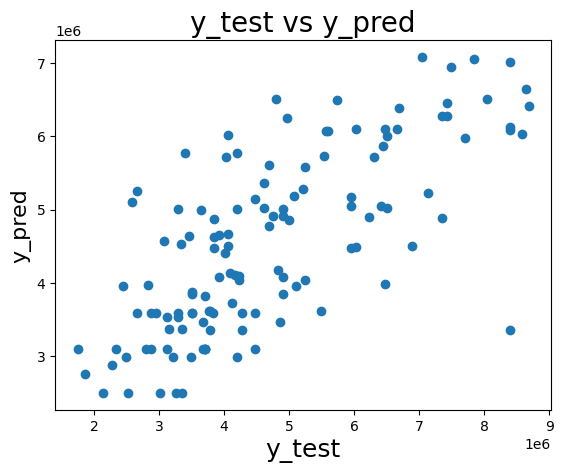

In [119]:
#Import necessary library
import matplotlib.pyplot as plt

#Your plotting code:
plt.scatter(y_test,y_predict)
plt.title('y_test vs y_pred', fontsize=20) # Changed from fig.suptitle to plt.title
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Step 10: Evaluating the model

In [120]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_predict)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-Sqaured (R2-Score): {r2}')
print("Model Coefficients:")
print(regression.coef_)

Mean Squared Error (MSE): 1396590759756.7407
Root Mean Squared Error (RMSE): 1181774.4115340882
R-Sqaured (R2-Score): 0.5154735302953686
Model Coefficients:
[1767879.26522718 1475368.92119728  598690.19657082  500675.44444703
  376416.68297797  724872.17600083 1043865.90913399  777512.22815843
  561347.53843054]
